In [1]:
from roboflow import Roboflow
from eduset.ssd.ssd import Model, VOCDataLoader, VOCDetection
from eduset.ssd.ssd import get_train_transform, get_valid_transform
from eduset.utils.plots import plot_results
from torch.optim import AdamW
from torch.optim.lr_scheduler import StepLR

import pandas as pd

import json

In [2]:
# source: https://universe.roboflow.com/jan-zmrzly/eduset-one-dataset/dataset/1

rf = Roboflow(api_key="fcoVgrABNNRobZYGuyhZ")
project = rf.workspace("jan-zmrzly").project("eduset-one-dataset")
dataset = project.version(1).download("voc")


loading Roboflow workspace...
loading Roboflow project...


In [3]:
with open('../eduset/ssd/config.json', 'r') as file:
    data = json.load(file)

batch_size = data["config"]["BATCH_SIZE"]
resize_to = data["config"]["RESIZE_TO"]
num_epochs = data["config"]["NUM_EPOCHS"]
num_workers = data["config"]["NUM_WORKERS"]

train_dictionary = data["config"]["TRAIN_DIR"] 
val_dictionary = data["config"]["VAL_DIR"] 

classes = [data["config"]["CLASSES"][str(i)]["name"] for i in range(data["config"]["NUM_CLASSES"])]
classes_vis = data["config"]["CLASSES"]
num_classes = data["config"]["NUM_CLASSES"]

out_dictionary = data["config"]["OUT_DIR"]

In [4]:
train_dataset = VOCDetection(root=train_dictionary,
                             classes=classes,
                             width=resize_to,
                             height=resize_to,
                             transforms=get_train_transform(),
                             name="Train")

val_dataset = VOCDetection(root=val_dictionary,
                           classes=classes, 
                           width=resize_to,
                           height=resize_to,
                           transforms=get_valid_transform(),
                           name="Validation")

print(train_dataset)
print(val_dataset)

Name:		Train
Classes:	['__background__', 'circle', 'square', 'triangle']
Items:		143

Name:		Validation
Classes:	['__background__', 'circle', 'square', 'triangle']
Items:		29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


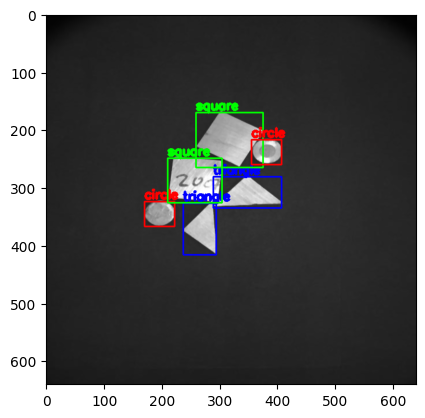

In [5]:
train_dataset.vizualize(idx=100, classes_vis=classes_vis)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


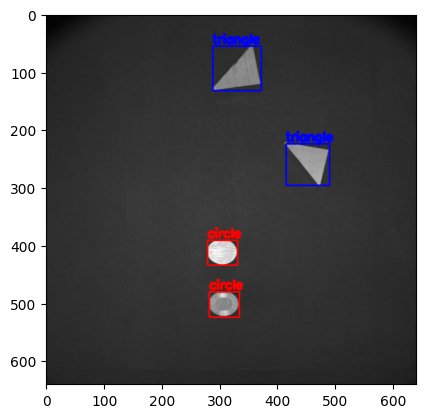

In [6]:
val_dataset.vizualize(idx=10, classes_vis=classes_vis)

In [7]:
train_dataloader = VOCDataLoader(train_dataset, shuffle=True)
val_dataloader = VOCDataLoader(val_dataset)

model = Model(train_dataloader=train_dataloader,
              val_dataloader=val_dataloader,
              epochs=num_epochs,
              out_dir=out_dictionary)
model.create(num_classes=num_classes, size=resize_to)
model.switch_gpu()

Model switched to cuda


In [8]:
optimizer = AdamW(params=model.params, 
                lr=0.0001)

scheduler = StepLR(optimizer=optimizer, 
                   step_size=15, 
                   gamma=0.01)

model.set_optimizer(optimizer)
model.set_scheduler(scheduler)

In [9]:
model.train()



Training


Loss: 6.3161: 100%|██████████| 8/8 [00:03<00:00,  2.18it/s] 


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]
Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.


Epoch #1 train loss: 8.114
Epoch #1 mAP: 0.12640856206417084
Epoch #1	Model was saved


Training


Loss: 5.2287: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


Epoch #2 train loss: 5.526
Epoch #2 mAP: 0.36067450046539307
Epoch #2	Model was saved


Training


Loss: 4.5115: 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


Epoch #3 train loss: 4.786
Epoch #3 mAP: 0.7335699200630188
Epoch #3	Model was saved


Training


Loss: 4.0689: 100%|██████████| 8/8 [00:03<00:00,  2.39it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


Epoch #4 train loss: 4.260
Epoch #4 mAP: 0.7965920567512512
Epoch #4	Model was saved


Training


Loss: 3.6883: 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


Epoch #5 train loss: 3.799
Epoch #5 mAP: 0.7917230725288391


Training


Loss: 3.4403: 100%|██████████| 8/8 [00:03<00:00,  2.46it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


Epoch #6 train loss: 3.445
Epoch #6 mAP: 0.8196597099304199
Epoch #6	Model was saved


Training


Loss: 3.0275: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


Epoch #7 train loss: 3.157
Epoch #7 mAP: 0.8285210132598877
Epoch #7	Model was saved


Training


Loss: 2.6985: 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


Epoch #8 train loss: 2.837
Epoch #8 mAP: 0.8441656827926636
Epoch #8	Model was saved


Training


Loss: 2.4945: 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


Epoch #9 train loss: 2.589
Epoch #9 mAP: 0.8267630338668823


Training


Loss: 2.2871: 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


Epoch #10 train loss: 2.394
Epoch #10 mAP: 0.8147781491279602


Training


Loss: 2.2201: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


Epoch #11 train loss: 2.217
Epoch #11 mAP: 0.8297553658485413


Training


Loss: 2.0811: 100%|██████████| 8/8 [00:03<00:00,  2.36it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


Epoch #12 train loss: 2.077
Epoch #12 mAP: 0.8063786625862122


Training


Loss: 2.0255: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


Epoch #13 train loss: 1.931
Epoch #13 mAP: 0.7973129153251648


Training


Loss: 1.9263: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


Epoch #14 train loss: 1.820
Epoch #14 mAP: 0.8176520466804504


Training


Loss: 1.6364: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


Epoch #15 train loss: 1.721
Epoch #15 mAP: 0.81048983335495


Training


Loss: 1.6747: 100%|██████████| 8/8 [00:03<00:00,  2.46it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


Epoch #16 train loss: 1.667
Epoch #16 mAP: 0.8287158608436584


Training


Loss: 1.6460: 100%|██████████| 8/8 [00:03<00:00,  2.39it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


Epoch #17 train loss: 1.646
Epoch #17 mAP: 0.8411806225776672


Training


Loss: 1.6030: 100%|██████████| 8/8 [00:03<00:00,  2.42it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


Epoch #18 train loss: 1.607
Epoch #18 mAP: 0.84717857837677
Epoch #18	Model was saved


Training


Loss: 1.5039: 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]


Epoch #19 train loss: 1.599
Epoch #19 mAP: 0.8502515554428101
Epoch #19	Model was saved


Training


Loss: 1.6617: 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


Epoch #20 train loss: 1.629
Epoch #20 mAP: 0.8656699657440186
Epoch #20	Model was saved


Training


Loss: 1.6124: 100%|██████████| 8/8 [00:03<00:00,  2.35it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


Epoch #21 train loss: 1.612
Epoch #21 mAP: 0.860210657119751


Training


Loss: 1.5978: 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


Epoch #22 train loss: 1.581
Epoch #22 mAP: 0.8623055219650269


Training


Loss: 1.5973: 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


Epoch #23 train loss: 1.579
Epoch #23 mAP: 0.8677741289138794
Epoch #23	Model was saved


Training


Loss: 1.5353: 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


Epoch #24 train loss: 1.567
Epoch #24 mAP: 0.8694010972976685
Epoch #24	Model was saved


Training


Loss: 1.5845: 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


Epoch #25 train loss: 1.574
Epoch #25 mAP: 0.8671464920043945


Training


Loss: 1.6032: 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


Epoch #26 train loss: 1.575
Epoch #26 mAP: 0.8463786244392395


Training


Loss: 1.6237: 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


Epoch #27 train loss: 1.607
Epoch #27 mAP: 0.8624809980392456


Training


Loss: 1.5186: 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


Epoch #28 train loss: 1.573
Epoch #28 mAP: 0.8506292700767517


Training


Loss: 1.5299: 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


Epoch #29 train loss: 1.591
Epoch #29 mAP: 0.8724621534347534
Epoch #29	Model was saved


Training


Loss: 1.6100: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


Epoch #30 train loss: 1.548
Epoch #30 mAP: 0.8756022453308105
Epoch #30	Model was saved


Training


Loss: 1.5565: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


Epoch #31 train loss: 1.561
Epoch #31 mAP: 0.8653075695037842


Training


Loss: 1.4968: 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


Epoch #32 train loss: 1.579
Epoch #32 mAP: 0.8707870244979858


Training


Loss: 1.5534: 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


Epoch #33 train loss: 1.555
Epoch #33 mAP: 0.8699922561645508


Training


Loss: 1.5210: 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


Epoch #34 train loss: 1.576
Epoch #34 mAP: 0.8656607270240784


Training


Loss: 1.4681: 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


Epoch #35 train loss: 1.564
Epoch #35 mAP: 0.8578633666038513


Training


Loss: 1.6295: 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


Epoch #36 train loss: 1.561
Epoch #36 mAP: 0.836096465587616


Training


Loss: 1.7531: 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


Epoch #37 train loss: 1.565
Epoch #37 mAP: 0.8672130107879639


Training


Loss: 1.4997: 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


Epoch #38 train loss: 1.560
Epoch #38 mAP: 0.8808267712593079
Epoch #38	Model was saved


Training


Loss: 1.5124: 100%|██████████| 8/8 [00:03<00:00,  2.40it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


Epoch #39 train loss: 1.552
Epoch #39 mAP: 0.8609140515327454


Training


Loss: 1.5547: 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


Epoch #40 train loss: 1.572
Epoch #40 mAP: 0.8665481209754944


Training


Loss: 1.5677: 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


Epoch #41 train loss: 1.598
Epoch #41 mAP: 0.8587984442710876


Training


Loss: 1.5157: 100%|██████████| 8/8 [00:03<00:00,  2.40it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


Epoch #42 train loss: 1.567
Epoch #42 mAP: 0.856819212436676


Training


Loss: 1.5822: 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


Epoch #43 train loss: 1.562
Epoch #43 mAP: 0.8619723320007324


Training


Loss: 1.6300: 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


Epoch #44 train loss: 1.549
Epoch #44 mAP: 0.861761212348938


Training


Loss: 1.5173: 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


Epoch #45 train loss: 1.565
Epoch #45 mAP: 0.8636547327041626


Training


Loss: 1.4857: 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


Epoch #46 train loss: 1.569
Epoch #46 mAP: 0.8530933260917664


Training


Loss: 1.5827: 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


Epoch #47 train loss: 1.594
Epoch #47 mAP: 0.8627731204032898


Training


Loss: 1.5118: 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


Epoch #48 train loss: 1.566
Epoch #48 mAP: 0.8688409924507141


Training


Loss: 1.5461: 100%|██████████| 8/8 [00:03<00:00,  2.39it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


Epoch #49 train loss: 1.577
Epoch #49 mAP: 0.8688518404960632


Training


Loss: 1.5638: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


Epoch #50 train loss: 1.597
Epoch #50 mAP: 0.8434609770774841
Metrics have been saved to ../samples/ssd_runs/model


<Figure size 640x480 with 0 Axes>

In [10]:
df = pd.read_csv("../samples/ssd_runs/model/results.csv")
df.head()

,epoch,loss score,mAP,mAP@50
0,1,6.316113,0.126409,0.235988
1,2,5.228703,0.360675,0.475369
2,3,4.511483,0.733570,0.897803
3,4,4.068910,0.796592,0.987954
4,5,3.688294,0.791723,0.994900


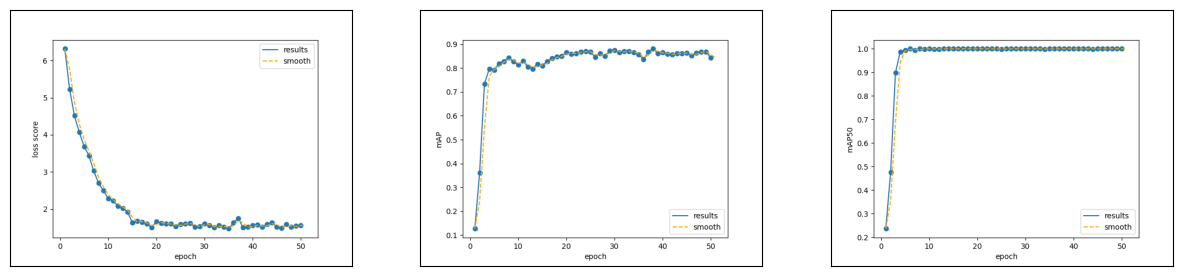

In [11]:
results = [
    "../samples/ssd_runs/model/loss score.png",
    "../samples/ssd_runs/model/mAP.png",
    "../samples/ssd_runs/model/mAP50.png"
]
plot_results(results)